In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
dfpre = pd.read_csv(r'/content/insurance_outliers.csv')

dfpre

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,1.688492e+04
1,18,male,33.770,1.0,no,southeast,1.725552e+03
2,28,male,33.000,3.0,no,southeast,4.449462e+03
3,33,male,22.705,0.0,no,northwest,2.198447e+04
4,32,male,28.880,0.0,no,northwest,3.866855e+03
...,...,...,...,...,...,...,...
1375,45,female,24.000,234.0,yes,southwest,4.726900e+04
1376,9,female,1000.000,0.0,yes,northwest,2.940000e+05
1377,23,male,NaN,0.0,NaN,southwest,1.629000e+03
1378,56,male,NaN,100.0,yes,NaN,NaN


In [4]:
df_dropped = dfpre.dropna()
print("\nDataFrame after dropping rows with missing values:")
df_dropped


DataFrame after dropping rows with missing values:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,1.688492e+04
1,18,male,33.770,1.0,no,southeast,1.725552e+03
2,28,male,33.000,3.0,no,southeast,4.449462e+03
3,33,male,22.705,0.0,no,northwest,2.198447e+04
4,32,male,28.880,0.0,no,northwest,3.866855e+03
...,...,...,...,...,...,...,...
1373,28,male,9875.000,0.0,yes,southwest,9.000000e+05
1374,56,female,24.000,100.0,yes,southwest,4.726900e+04
1375,45,female,24.000,234.0,yes,southwest,4.726900e+04
1376,9,female,1000.000,0.0,yes,northwest,2.940000e+05


# New Section

In [5]:

# Ensure you only keep numeric columns
df_dropped_numeric = df_dropped.select_dtypes(include=[np.number])

# Drop rows with missing values (NaN) if any
df_dropped_numeric = df_dropped_numeric.dropna()

# Calculate z-scores
z_scores = np.abs(stats.zscore(df_dropped_numeric))
z_scores

,age,bmi,children,charges
0,1.430291,0.067277,0.152697,0.007809
1,1.501232,0.058015,0.060724,0.202973
2,0.791823,0.059230,0.123222,0.167905
3,0.437118,0.075473,0.152697,0.057843
4,0.508059,0.065730,0.152697,0.175405
...,...,...,...,...
1373,0.791823,15.468552,0.152697,11.361513
1374,1.194523,0.073430,9.044600,0.383359
1375,0.414173,0.073430,21.368978,0.383359
1376,2.139701,1.466411,0.152697,3.559801


In [6]:
# Define a threshold for identifying outliers
threshold = 2  # Common threshold for Z-scores

# Identify outliers
outliers = (z_scores > threshold)
print("\nOutliers identified (True indicates outlier):")
outliers


Outliers identified (True indicates outlier):


,age,bmi,children,charges
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1373,False,True,False,True
1374,False,False,True,False
1375,False,False,True,False
1376,True,False,False,True


In [7]:
# Remove outliers
df_cleaned = df_dropped[~(outliers.any(axis=1))]
print("\nCleaned DataFrame after removing outliers:")
df_cleaned


Cleaned DataFrame after removing outliers:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,0.0,no,southwest,2007.94500


In [8]:
for i, row in enumerate(z_scores):
    print(f"Row {i} Z-scores: {row}, Original Values: {df_dropped.iloc[i].values}")


Row 0 Z-scores: age, Original Values: [19 'female' 27.9 0.0 'yes' 'southwest' 16884.924]
Row 1 Z-scores: bmi, Original Values: [18 'male' 33.77 1.0 'no' 'southeast' 1725.5523]
Row 2 Z-scores: children, Original Values: [28 'male' 33.0 3.0 'no' 'southeast' 4449.462]
Row 3 Z-scores: charges, Original Values: [33 'male' 22.705 0.0 'no' 'northwest' 21984.47061]


In [9]:
import numpy as np

# Ensure you only keep numeric columns in both DataFrames
df_dropped_numeric = df_dropped.select_dtypes(include=[np.number])
df_cleaned_numeric = df_cleaned.select_dtypes(include=[np.number])

# Drop rows with missing values (NaN) if any
df_dropped_numeric = df_dropped_numeric.dropna()
df_cleaned_numeric = df_cleaned_numeric.dropna()

# Calculate mean and standard deviation of the original DataFrame (df_dropped)
mean_original = df_dropped_numeric.mean()
std_original = df_dropped_numeric.std()

print("\nMean of the original DataFrame:")
print(mean_original)

print("\nStandard deviation of the original DataFrame:")
print(std_original)

# Calculate mean and standard deviation of the cleaned DataFrame (df_cleaned)
mean_cleaned = df_cleaned_numeric.mean()
std_cleaned = df_cleaned_numeric.std()

print("\nMean of the cleaned DataFrame:")
print(mean_cleaned)

print("\nStandard deviation of the cleaned DataFrame:")
print(std_cleaned)



Mean of the original DataFrame:
age            39.161721
bmi            70.542007
children        1.660237
charges     17491.494800
dtype: float64

Standard deviation of the original DataFrame:
age            14.101466
bmi           634.066875
children       10.876795
charges     77704.090971
dtype: float64

Mean of the cleaned DataFrame:
age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

Standard deviation of the cleaned DataFrame:
age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64


In [10]:
z_scores_manual_original = (df_dropped - mean_original) / std_original

print("\nZ-scores calculated using mean and standard deviation of the original DataFrame:")
z_scores_manual_original



Z-scores calculated using mean and standard deviation of the original DataFrame:


,age,bmi,charges,children,region,sex,smoker
0,-1.429761,-0.067252,-0.007806,-0.152640,NaN,NaN,NaN
1,-1.500675,-0.057994,-0.202897,-0.060701,NaN,NaN,NaN
2,-0.791529,-0.059208,-0.167842,0.123176,NaN,NaN,NaN
3,-0.436956,-0.075445,0.057822,-0.152640,NaN,NaN,NaN
4,-0.507871,-0.065706,-0.175340,-0.152640,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1373,-0.791529,15.462814,11.357298,-0.152640,NaN,NaN,NaN
1374,1.194080,-0.073402,0.383217,9.041244,NaN,NaN,NaN
1375,0.414019,-0.073402,0.383217,21.361050,NaN,NaN,NaN
1376,-2.138907,1.465867,3.558481,-0.152640,NaN,NaN,NaN


In [11]:
# Z-scores for the cleaned DataFrame
z_scores_manual_cleaned = (df_cleaned - mean_cleaned) / std_cleaned

print("\nZ-scores for the cleaned DataFrame:")
z_scores_manual_cleaned


Z-scores for the cleaned DataFrame:


,age,bmi,charges,children,region,sex,smoker
0,-1.438227,-0.453151,0.298472,-0.908274,NaN,NaN,NaN
1,-1.509401,0.509431,-0.953333,-0.078738,NaN,NaN,NaN
2,-0.797655,0.383164,-0.728402,1.580335,NaN,NaN,NaN
3,-0.441782,-1.305043,0.719574,-0.908274,NaN,NaN,NaN
4,-0.512957,-0.292447,-0.776512,-0.908274,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1333,0.768185,0.050278,-0.220468,1.580335,NaN,NaN,NaN
1334,-1.509401,0.206062,-0.913661,-0.908274,NaN,NaN,NaN
1335,-1.509401,1.014499,-0.961237,-0.908274,NaN,NaN,NaN
1336,-1.295877,-0.797515,-0.930014,-0.908274,NaN,NaN,NaN


In [134]:
df = pd.read_csv(r'/content/insurance.csv')
df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [133]:
df.shape

(1338, 7)

# New Section

In [15]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:

#checking discriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
#value counts for categorical variables
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


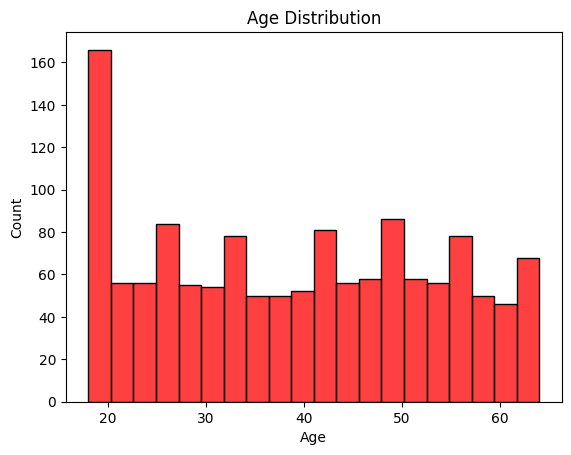

In [67]:
#age distribution
sns.histplot(df.age,bins=20, kde=False,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

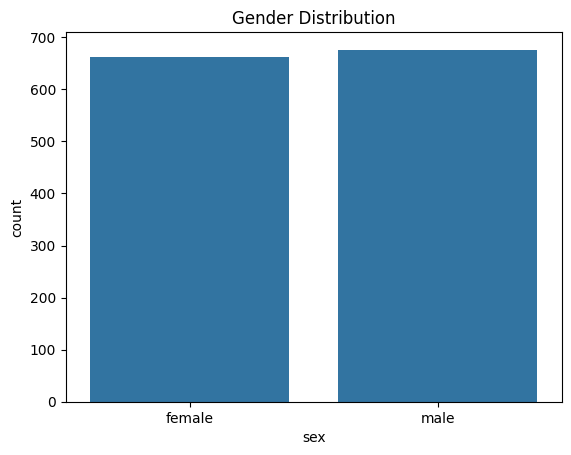

In [68]:
#gender plot
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')

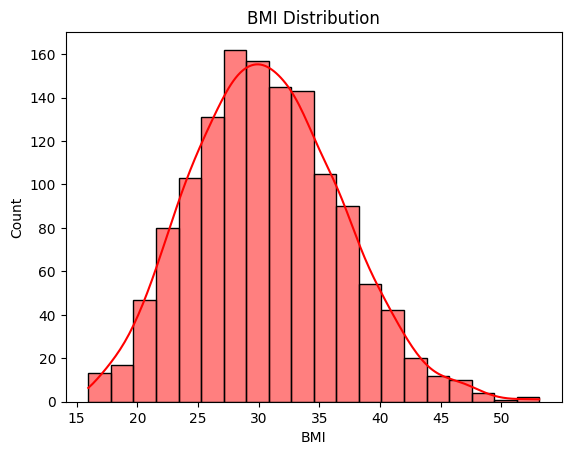

In [69]:
#bmi distribution
sns.histplot(df.bmi,bins=20, kde=True,color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

<ipython-input-70-bb7d508a8e17>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette=custom_colors)


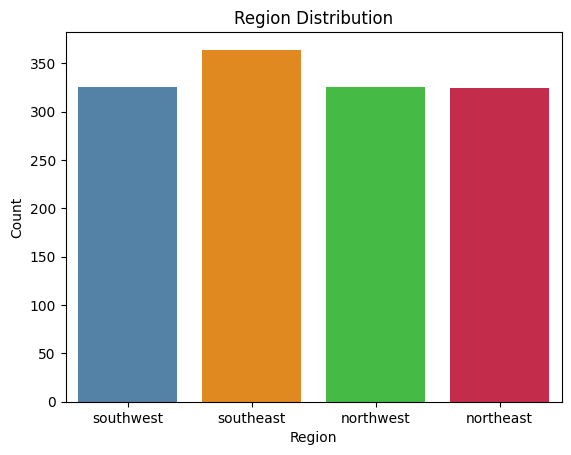

In [70]:
# Define your custom colors to match the image
custom_colors = ["#4682B4", "#FF8C00", "#32CD32", "#DC143C"]

# Create the countplot with custom colors
sns.countplot(x='region', data=df, palette=custom_colors)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

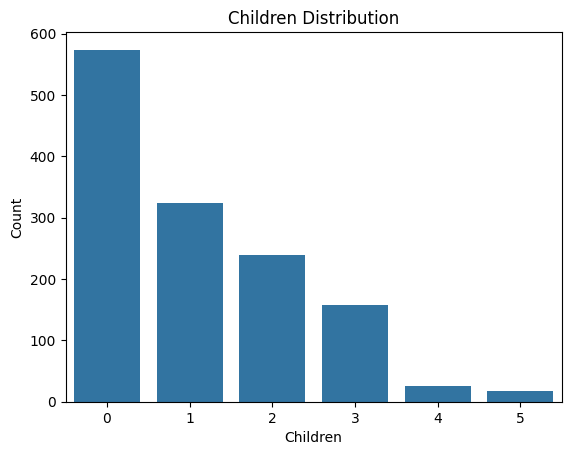

In [135]:

#child count distribution
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

<ipython-input-71-d3f835d6d54d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette=custom_colors)


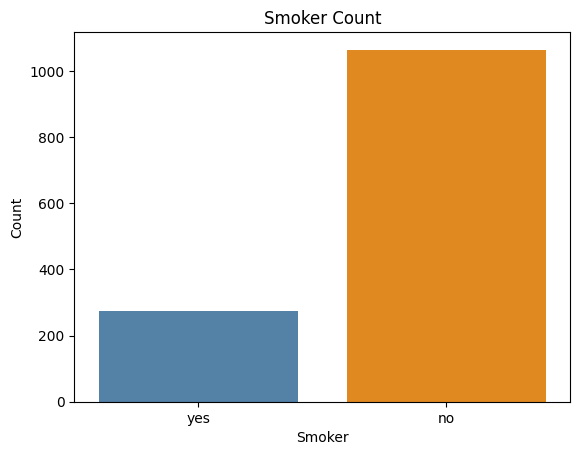

In [71]:


# Define custom colors to match the image
custom_colors = ["#4682B4", "#FF8C00"]

# Create the countplot with custom colors
sns.countplot(x='smoker', data=df, palette=custom_colors)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='smoker', ylabel='count'>

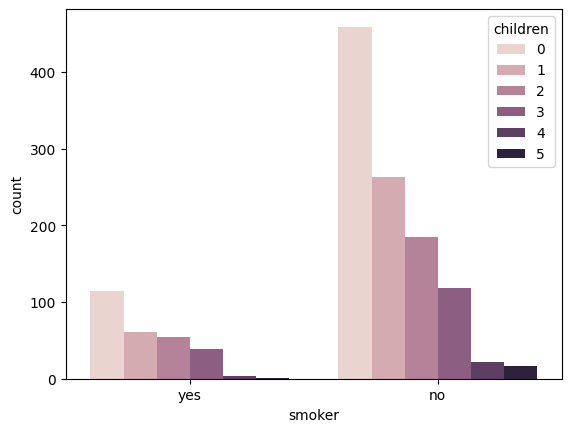

In [72]:
sns.countplot(x = df.smoker, hue = df.children)

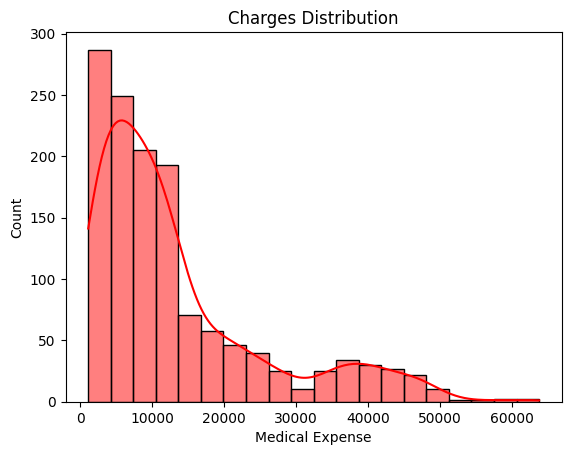

In [73]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

In [78]:
import pandas as pd

# Encode categorical columns
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Select individual numeric columns
selected_corr = correlation_matrix.loc[['age', 'bmi', 'children', 'charges'], ['age', 'bmi', 'children', 'charges']]

# Calculate average correlations for categorical variables
# For 'sex', 'smoker', and 'region'
sex_corr = correlation_matrix.loc[['sex_male'], ['age', 'bmi', 'children', 'charges']].mean()
smoker_corr = correlation_matrix.loc[['smoker_yes'], ['age', 'bmi', 'children', 'charges']].mean()
region_corr = correlation_matrix.loc[['region_northwest', 'region_southeast', 'region_southwest'], ['age', 'bmi', 'children', 'charges']].mean()

# Combine everything into a single DataFrame
correlation_matrix_final = selected_corr.copy()
correlation_matrix_final.loc['sex'] = sex_corr
correlation_matrix_final.loc['smoker'] = smoker_corr
correlation_matrix_final.loc['region'] = region_corr

# Add the categorical correlations as columns as well
correlation_matrix_final['sex'] = sex_corr
correlation_matrix_final['smoker'] = smoker_corr
correlation_matrix_final['region'] = region_corr



# Display the final correlation matrix with original column names
correlation_matrix_final

,age,bmi,children,charges,sex,smoker,region
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000678
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,0.042608
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.007885
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.003044
sex,-0.020856,0.046371,0.017163,0.057292,NaN,NaN,NaN
smoker,-0.025019,0.003750,0.007673,0.787251,NaN,NaN,NaN
region,-0.000678,0.042608,0.007885,-0.003044,NaN,NaN,NaN


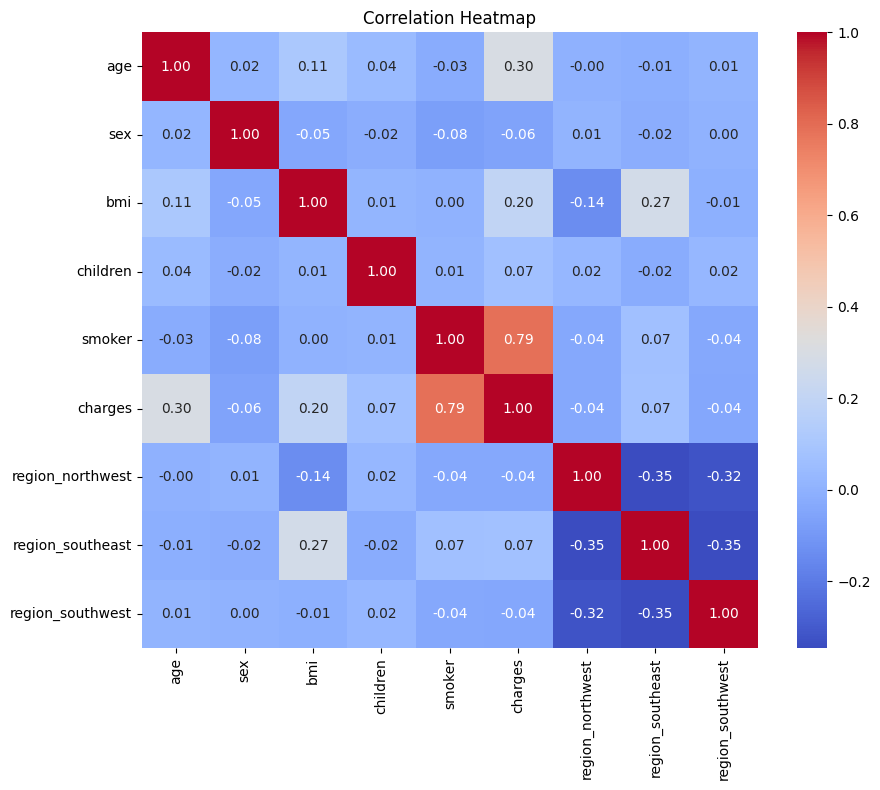

In [131]:
# Calculate the correlation matrix for the dataset
correlation_matrix_final = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap")
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()



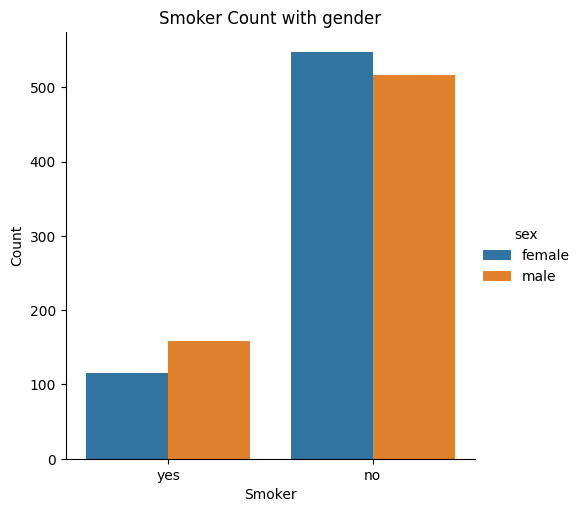

In [111]:

sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='sex', ylabel='charges'>

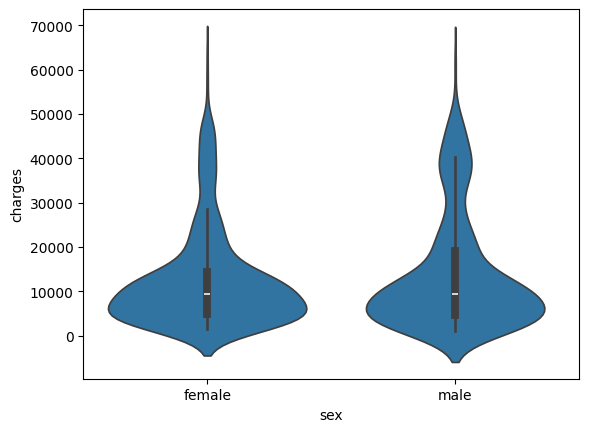

In [81]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

<ipython-input-126-448cd448ed2c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="smoker", x="charges", data=df[df["sex"] == 0], orient="h", palette="Set2")


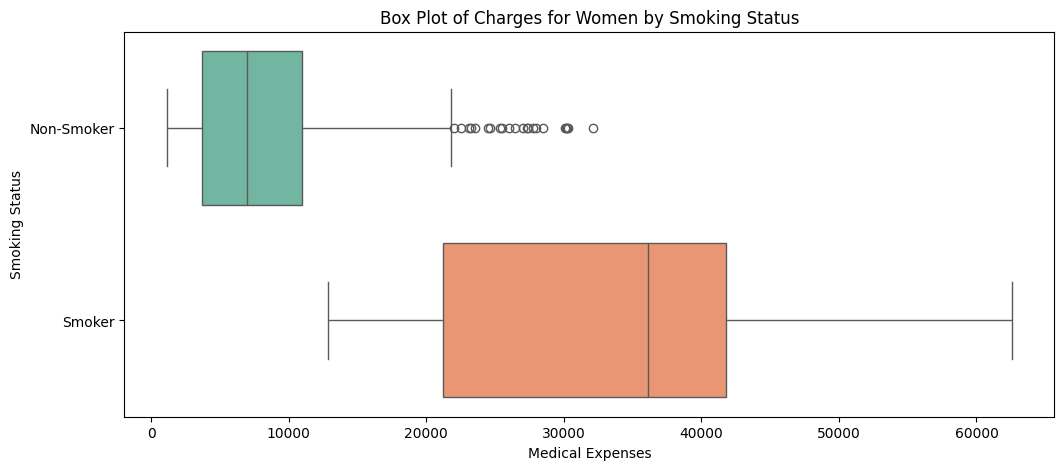

In [126]:
# Box plot for charges of women by smoking status
plt.figure(figsize=(12, 5))
plt.title("Box Plot of Charges for Women by Smoking Status")
sns.boxplot(y="smoker", x="charges", data=df[df["sex"] == 0], orient="h", palette="Set2")
plt.xlabel("Medical Expenses")
plt.ylabel("Smoking Status")
plt.yticks([0, 1], ["Non-Smoker", "Smoker"])
plt.show()


<ipython-input-124-f45e8468581b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="charges", y="smoker", data=df[df["sex"] == 1], orient="h", palette="Set2")


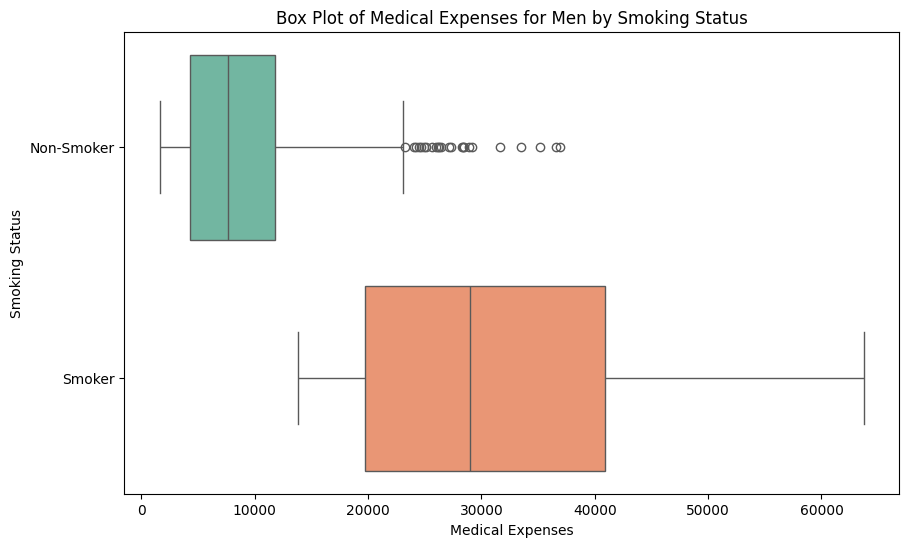

In [124]:
# Box plot of charges for men by smoking status
plt.figure(figsize=(10, 6))
plt.title("Box Plot of Medical Expenses for Men by Smoking Status")
sns.boxplot(x="charges", y="smoker", data=df[df["sex"] == 1], orient="h", palette="Set2")
plt.xlabel("Medical Expenses")
plt.ylabel("Smoking Status")
plt.yticks([0, 1], ["Non-Smoker", "Smoker"])
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


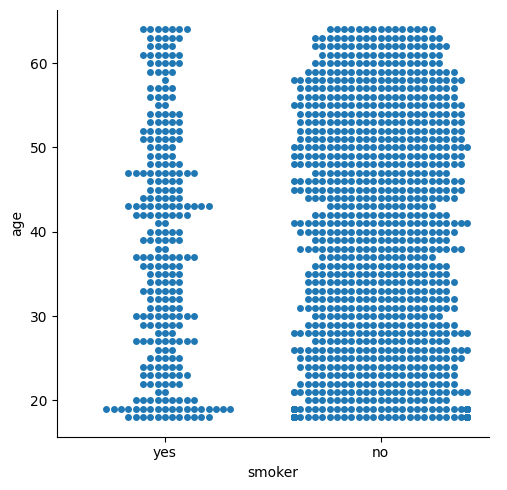

In [84]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df)

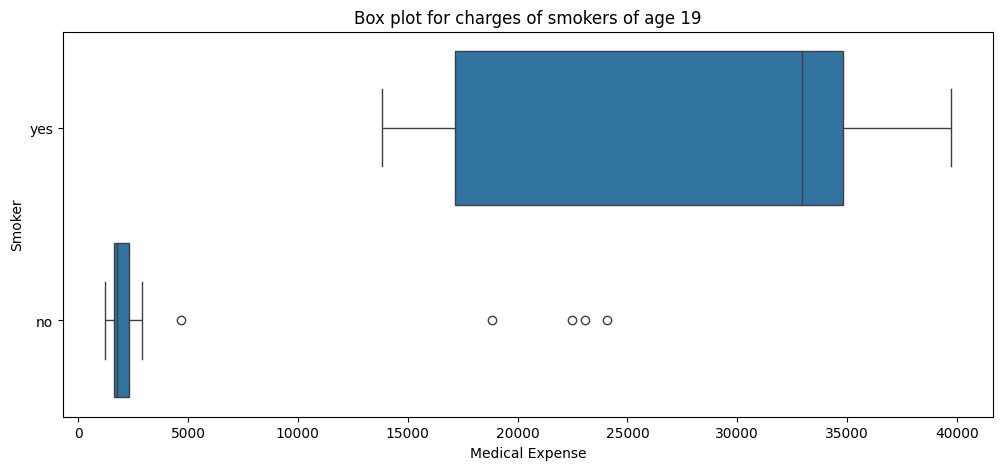

In [85]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data =  df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

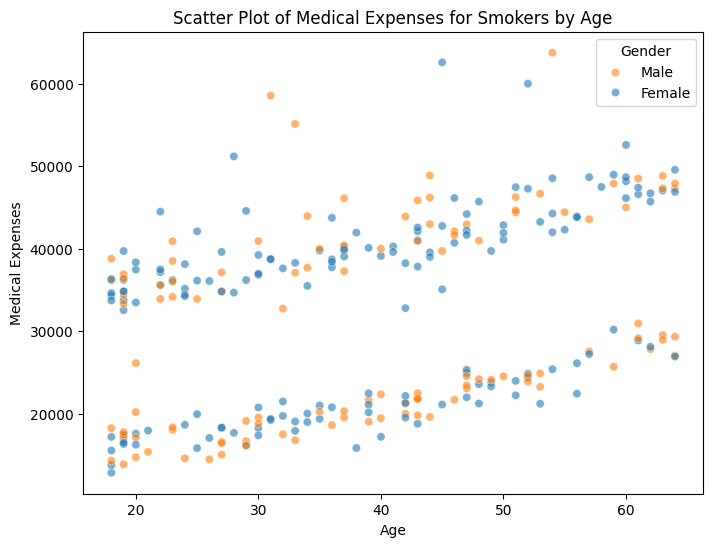

In [125]:
# Scatter plot of charges for smokers by age, with hue for gender
plt.figure(figsize=(8, 6))
plt.title("Scatter Plot of Medical Expenses for Smokers by Age")
sns.scatterplot(x="age", y="charges", hue="sex", data=df[df["smoker"] == 1], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()


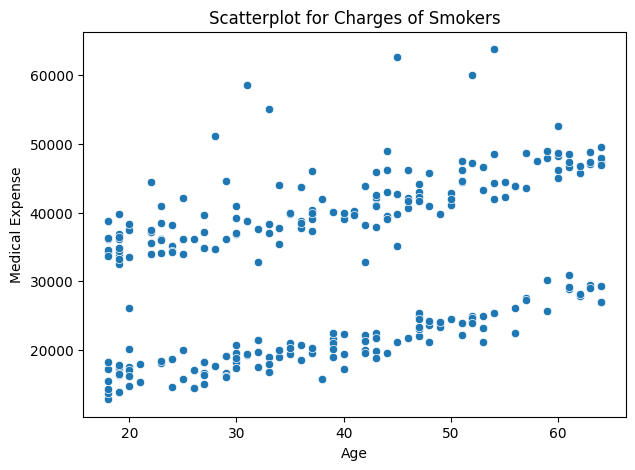

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example of how the DataFrame might look
# df = pd.read_csv('your_data.csv')  # Assuming you load your data here

# Ensure no missing values
df.dropna(subset=['age', 'charges'], inplace=True)

# If smoker column is categorical ('yes'/'no'), adjust the filter
df_smokers = df[df['smoker'] == 'yes']

# Plotting
plt.figure(figsize=(7, 5))
plt.title("Scatterplot for Charges of Smokers")
sns.scatterplot(x="age", y="charges", data=df_smokers)
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()


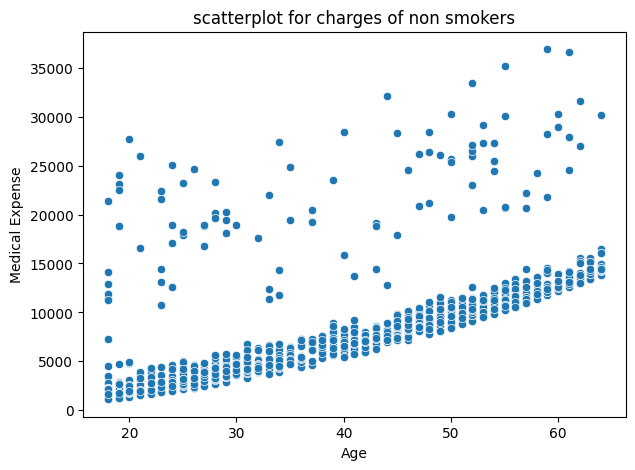

In [127]:
#non smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

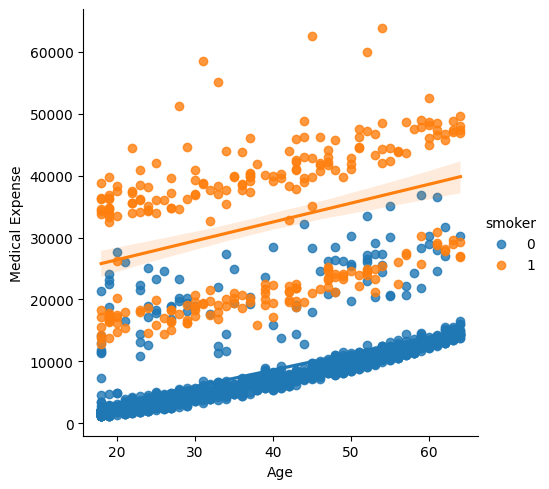

In [128]:
#age charges distribution

sns.lmplot(x="age", y="charges", data =  df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

<ipython-input-89-1572e034011d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['charges'])


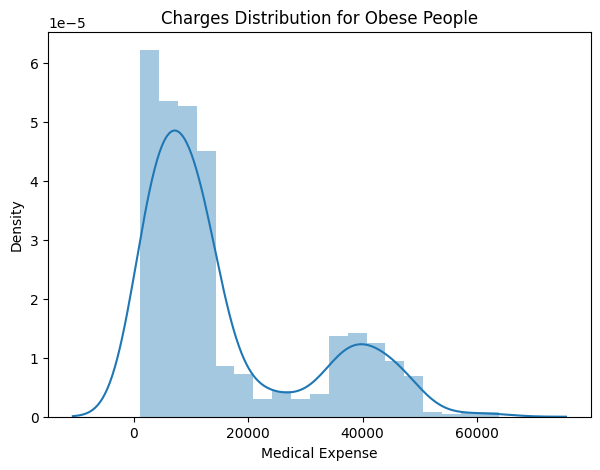

In [89]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

<ipython-input-90-1ad75a47c6a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'])


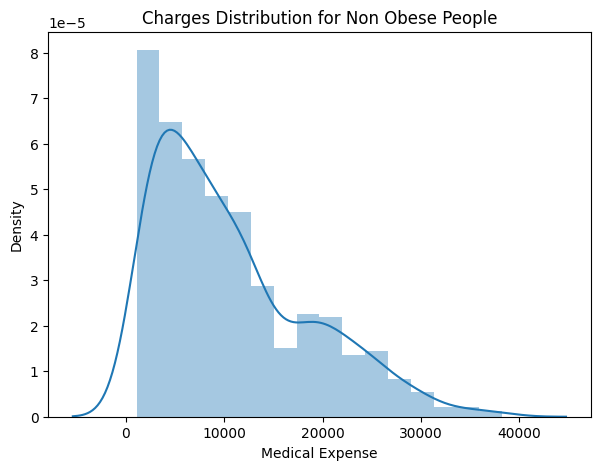

In [90]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

In [114]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, f1_score,
                             mean_squared_error, mean_absolute_error, r2_score)





In [115]:
# Set a hypothetical mean for the charges column (e.g., 15000)
hypothetical_mean = 15000

# Perform a one-sample t-test
t_stat, p_value = ttest_1samp(df['charges'], hypothetical_mean)

# Display results
print("Hypothesis Testing Results:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation of result
if p_value < 0.05:
    print("The mean of charges is significantly different from 15000.")
else:
    print("The mean of charges is not significantly different from 15000.")


Hypothesis Testing Results:
t-statistic: -5.2242, p-value: 0.0000
The mean of charges is significantly different from 15000.


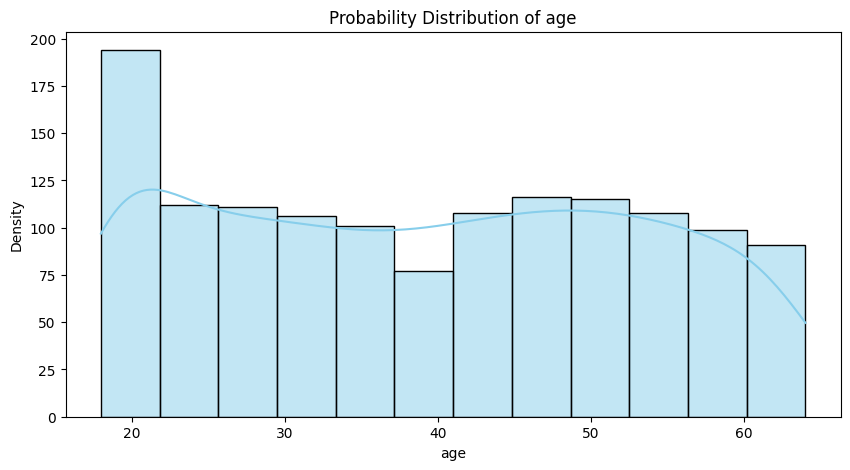

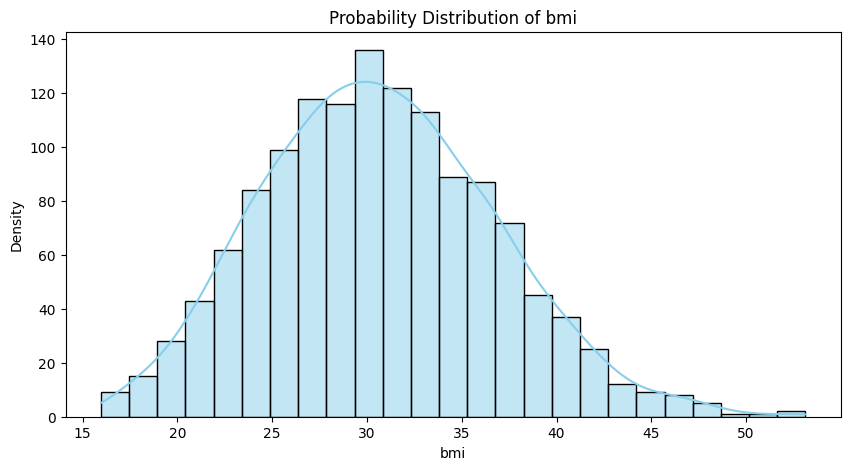

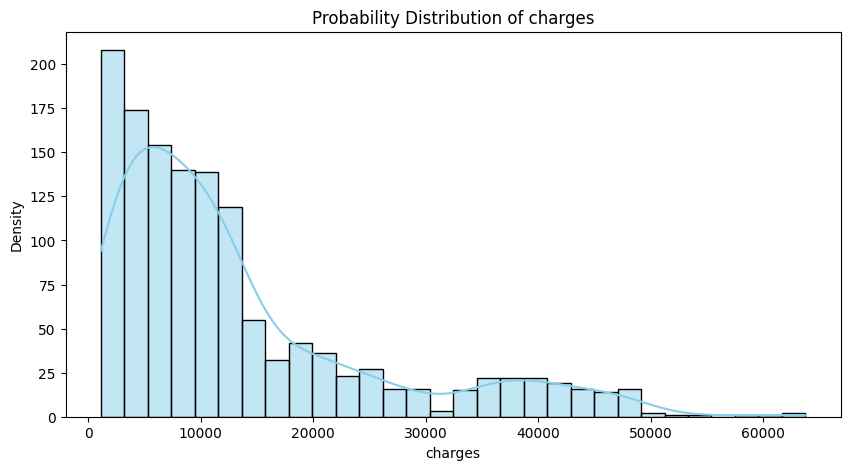

In [116]:
# Plot histograms and KDE for continuous columns: age, bmi, and charges
for column in ['age', 'bmi', 'charges']:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, color="skyblue")
    plt.title(f'Probability Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [117]:
# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Define features (X) and target (y) for smoker classification
X = df.drop(columns=['smoker', 'charges'])
y_class = df['smoker']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3, random_state=0)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_class = log_reg.predict(X_test)

# Evaluation Metrics
print("Logistic Regression Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print(f"Precision: {precision_score(y_test, y_pred_class):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_class):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_class):.4f}")


Logistic Regression Evaluation:
Confusion Matrix:
 [[318   0]
 [ 84   0]]
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Linear Regression Evaluation:
Mean Squared Error: 33342497.8270
Mean Absolute Error: 4011.4497
R-squared: 0.7909


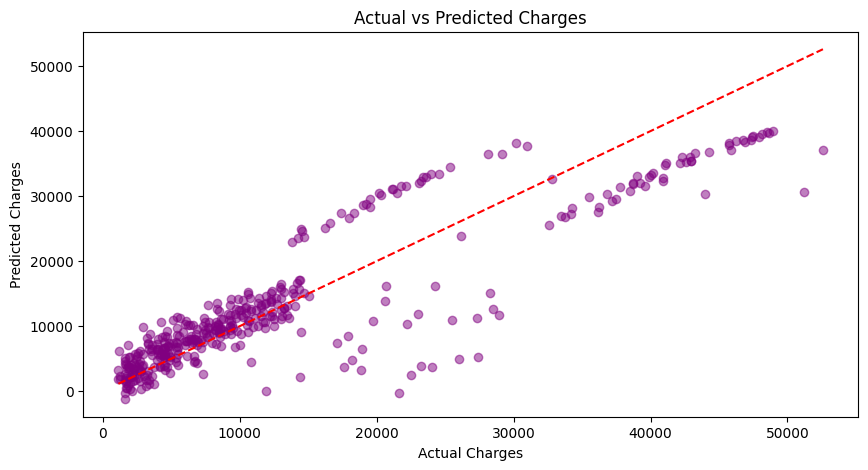

In [118]:
# Define features (X) and target (y) for charges prediction
X_reg = df.drop(columns=['charges'])
y_reg = df['charges']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=0)

# Train linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred_reg = lin_reg.predict(X_test)

# Evaluation Metrics
print("Linear Regression Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_reg):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_reg):.4f}")
print(f"R-squared: {r2_score(y_test, y_pred_reg):.4f}")

# Plot actual vs predicted charges
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_reg, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


In [121]:
# Define features (X) and target (y) for smoker classification again to be safe
X = df.drop(columns=['smoker', 'charges'])
y_class = df['smoker']  # Use the categorical target variable for classification

# Split data into training and test sets
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=0)

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train_class)

# Predict on test set
y_pred_tree = tree_clf.predict(X_test)

# Evaluation Metrics
print("Decision Tree Classifier Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_tree))
print(f"Precision: {precision_score(y_test_class, y_pred_tree):.4f}")
print(f"Recall: {recall_score(y_test_class, y_pred_tree):.4f}")
print(f"F1 Score: {f1_score(y_test_class, y_pred_tree):.4f}")



Decision Tree Classifier Evaluation:
Confusion Matrix:
 [[240  78]
 [ 66  18]]
Precision: 0.1875
Recall: 0.2143
F1 Score: 0.2000


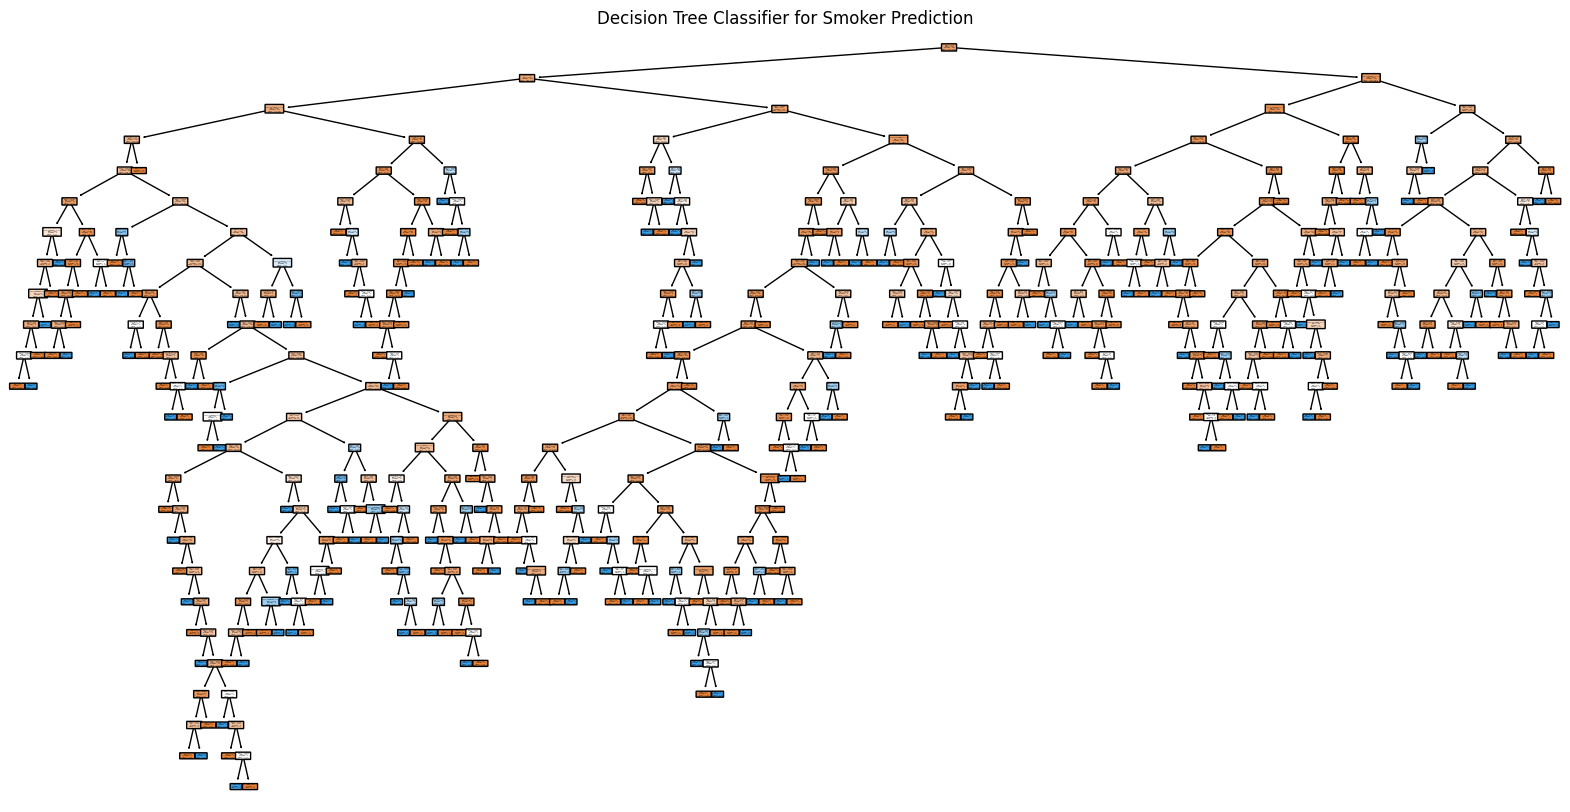

In [122]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names=['Non-Smoker', 'Smoker'], filled=True, rounded=True)
plt.title("Decision Tree Classifier for Smoker Prediction")
plt.show()


Random Forest Regressor Evaluation:
Mean Squared Error: 22502869.3303
Mean Absolute Error: 2772.4725
R-squared: 0.8589


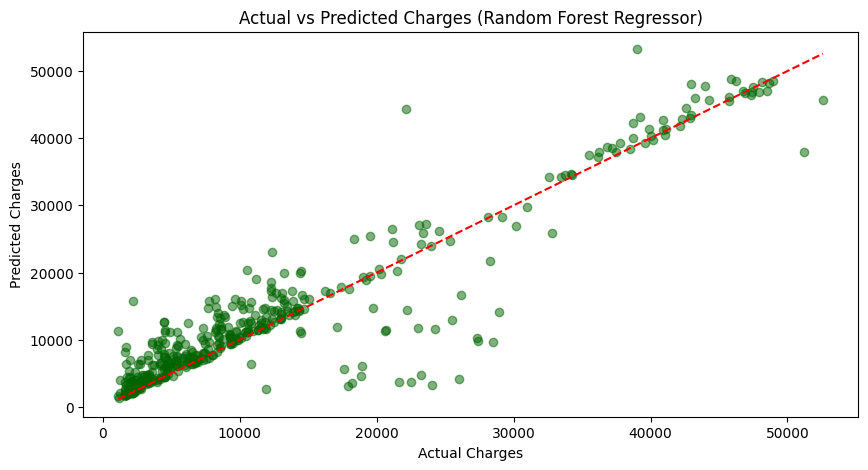

In [120]:
# Train Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluation Metrics
print("Random Forest Regressor Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"R-squared: {r2_score(y_test, y_pred_rf):.4f}")

# Plot actual vs predicted charges
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='darkgreen', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Random Forest Regressor)")
plt.show()
